Change in radius (d_r): 1.00
Change in angle (d_theta): 0.00 radians


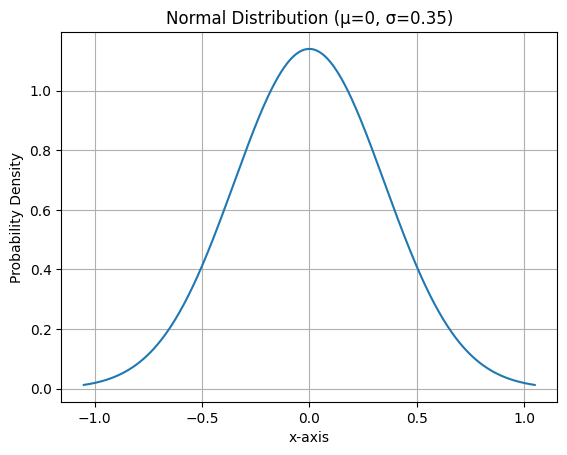

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define mean and standard deviation
mu = 0
sigma = 0.35

# Create x-axis values covering a range around the mean
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 400)

# Calculate probability density for each x value using norm.pdf
y = norm.pdf(x, loc=mu, scale=sigma)

# Configure and display the plot
plt.plot(x, y)
plt.xlabel("x-axis")
plt.ylabel("Probability Density")
plt.title("Normal Distribution (μ={}, σ={})".format(mu, sigma))
plt.grid(True)
plt.show()


In [ ]:
# V1    PRETRAIN

def get_reward(curr_z, goal_pos = 1) -> float:
    reward = 0
    
    distance_from_goal = abs(curr_z-goal_pos)

    if distance_from_goal < 0.1:   # Goal Reward
        reward += 20 + (1 - distance_from_goal) * 2

    reward += 1 * (1 - distance_from_goal ** 2)  # Get to Goal reward

    reward += 0.1     # Keep alive reward

    return reward


# V2    PRETRAIN

def linear_eucl_distance_reward(self, desired_pos, current_pos, max_rew=100, scale=20):
    goal_distance = np.linalg.norm(current_pos - desired_pos)
    if goal_distance < 0.1:
        reward = max_rew
    else:
        reward = max_rew / 5 - scale * goal_distance

    return reward
def get_reward(curr_z, goal_pos = 1) -> float:
    distance_from_goal = abs(curr_z-goal_pos)
    

    goal_dist_reward = linear_eucl_distance_reward(np.array((0, distance_from_goal)), np.array((0, 0)))

    reward = goal_dist_reward + 2

    return reward

# V4    FINE TUNE (ONLY ON GOAL) (make it smaller the <0.05 to increase accuracy)
def get_reward(curr_z, goal_pos = 1) -> float:
    reward = 0

    distance_from_goal = abs(curr_z-goal_pos)

    if distance_from_goal < 0.05:  # Goal Reward
        reward += 100

    return reward

# V5    UNLEARN
def get_reward(self, action=None) -> float:
    reward = 0

    z = self.robot.getPosition()[2]

    if (abs(z - 1) < 0.1):
        reward -= 100

    return reward

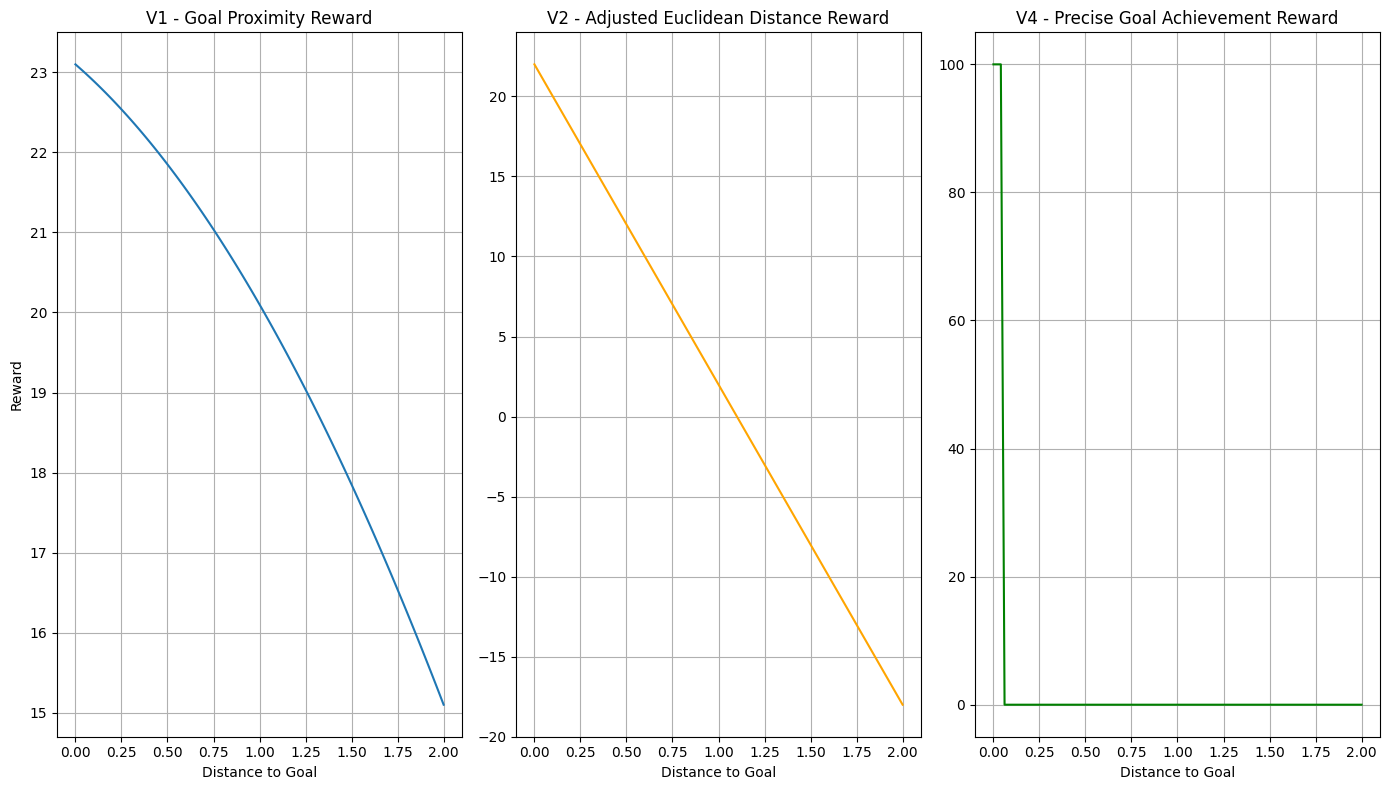

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define distance range for plotting
distance_from_goal = np.linspace(0, 2, 100)  # Distance from 0 to 1

# V1 - Goal Proximity Reward
reward_v1 = 20 + (1 - distance_from_goal) * 2 + 1 * (1 - distance_from_goal ** 2) + 0.1

# V2 - Adjusted Euclidean Distance Reward, assuming d_theta = 0 for simplicity
max_rew = 100
scale = 20
goal_dist_reward_v2 = (max_rew / 5 - scale * distance_from_goal) * np.cos(0) + 2

# V4 - Precise Goal Achievement Reward
reward_v4 = np.where(distance_from_goal < 0.05, 100, 0)

# Plotting
plt.figure(figsize=(14, 8))

# Plot for V1
plt.subplot(1, 3, 1)
plt.plot(distance_from_goal, reward_v1, label="Goal Proximity Reward")
plt.xlabel('Distance to Goal')
plt.ylabel('Reward')
plt.title('V1 - Goal Proximity Reward')
plt.grid(True)

# Plot for V2
plt.subplot(1, 3, 2)
plt.plot(distance_from_goal, goal_dist_reward_v2, label="Adjusted Euclidean Distance Reward", color='orange')
plt.xlabel('Distance to Goal')
plt.title('V2 - Adjusted Euclidean Distance Reward')
plt.grid(True)

# Plot for V4
plt.subplot(1, 3, 3)
plt.plot(distance_from_goal, reward_v4, label="Precise Goal Achievement Reward", color='green')
plt.xlabel('Distance to Goal')
plt.title('V4 - Precise Goal Achievement Reward')
plt.grid(True)

plt.tight_layout()
plt.show()
